# 1.Load  the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
pd_data = pd.read_csv("phuongdong_google_reviews_24_4.csv")

In [4]:
pd_data.head()

,name_comment,rating,time,review
0,gautham kalyan,5 stars,7 months ago,I visited this hospital to do a pregnancy test...
1,Anm 7968,3 stars,10 months ago,"If you are Vietnamese, this hospital isn’t a b..."
2,Angie Viv,3 stars,2 years ago,The hospital is quite big with new equipments....
3,JimmY Aldrich,2 stars,3 years ago,The garden and the cleanliness is the only nic...
4,carl davies,5 stars,4 years ago,I'm a foreigner who got surgery on my shoulder...


# 2. Data Clean

In [5]:
pd_data[['number', 'duration', 'Ago']] = pd_data['time'].str.split(" ", expand = True)

In [6]:
pd_data

,name_comment,rating,time,review,number,duration,Ago
0,gautham kalyan,5 stars,7 months ago,I visited this hospital to do a pregnancy test...,7,months,ago
1,Anm 7968,3 stars,10 months ago,"If you are Vietnamese, this hospital isn’t a b...",10,months,ago
2,Angie Viv,3 stars,2 years ago,The hospital is quite big with new equipments....,2,years,ago
3,JimmY Aldrich,2 stars,3 years ago,The garden and the cleanliness is the only nic...,3,years,ago
4,carl davies,5 stars,4 years ago,I'm a foreigner who got surgery on my shoulder...,4,years,ago
...,...,...,...,...,...,...,...
521,Thế giới Máy chế biến gỗ,5 stars,a month ago,"Dịch vụ tốt, chu đáo",a,month,ago
522,Tom Garden,5 stars,3 years ago,NaN,3,years,ago
523,THÁI VŨ,4 stars,2 years ago,NaN,2,years,ago
524,Trang Le,5 stars,4 years ago,NaN,4,years,ago


In [7]:
pd_data["duration"].value_counts(normalize = True).to_frame().style.format('{:.1%}')

,duration
years,27.0%
months,25.7%
month,18.4%
year,16.2%
weeks,6.3%
week,4.2%
days,1.7%
day,0.6%


In [8]:
pd_data.loc[pd_data['duration']== 'months', 'duration'] = 'month'
pd_data.loc[pd_data['duration']== 'years', 'duration'] = 'year'
pd_data.loc[pd_data['duration']== 'days', 'duration'] = 'day'
pd_data.loc[pd_data['duration']== 'weeks', 'duration'] = 'week'

In [9]:
pd_data["duration"].value_counts()

month    232
year     227
week      55
day       12
Name: duration, dtype: int64

In [10]:
pd_data.loc[pd_data['number']== 'a', 'number'] = '1'

In [11]:
pd_data.drop('Ago', axis = 1, inplace = True)

In [12]:
#change the type of column number to int for next calculation
pd_data['number'] = pd_data['number'].astype(int)

In [13]:
#convert year, month, week time to day 
pd_data.loc[pd_data['duration']== 'month', 'number'] *=30
pd_data.loc[pd_data['duration']== 'year', 'number'] *=365
pd_data.loc[pd_data['duration']== 'week', 'number'] *=7

In [14]:
pd_data.head()

,name_comment,rating,time,review,number,duration
0,gautham kalyan,5 stars,7 months ago,I visited this hospital to do a pregnancy test...,210,month
1,Anm 7968,3 stars,10 months ago,"If you are Vietnamese, this hospital isn’t a b...",300,month
2,Angie Viv,3 stars,2 years ago,The hospital is quite big with new equipments....,730,year
3,JimmY Aldrich,2 stars,3 years ago,The garden and the cleanliness is the only nic...,1095,year
4,carl davies,5 stars,4 years ago,I'm a foreigner who got surgery on my shoulder...,1460,year


Now we have number column as the number of days passing by since the reviewer left comment on Google Reviews. We will drop the unimportant columns and change the name of number col to days ago. 

In [15]:
pd_data.drop(columns =['time', 'duration'], inplace = True)

In [16]:
pd_data.rename(columns = {'number': 'days ago'}, inplace = True)

In [17]:
pd_data.head()

,name_comment,rating,review,days ago
0,gautham kalyan,5 stars,I visited this hospital to do a pregnancy test...,210
1,Anm 7968,3 stars,"If you are Vietnamese, this hospital isn’t a b...",300
2,Angie Viv,3 stars,The hospital is quite big with new equipments....,730
3,JimmY Aldrich,2 stars,The garden and the cleanliness is the only nic...,1095
4,carl davies,5 stars,I'm a foreigner who got surgery on my shoulder...,1460


In [18]:
#extract only the numeric elements from rating col
list1 = ['rating']
for i in list1:
    pd_data[i] = pd_data[i].str.extract('(\d+)')
    

In [19]:
pd_data['rating']=pd_data['rating'].astype(int)

In [294]:
pd_data['rating'].value_counts()

5    301
1    142
4    45 
2    21 
3    17 
Name: rating, dtype: int64

In [20]:
pd_data.head()

,name_comment,rating,review,days ago
0,gautham kalyan,5,I visited this hospital to do a pregnancy test...,210
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a b...",300
2,Angie Viv,3,The hospital is quite big with new equipments....,730
3,JimmY Aldrich,2,The garden and the cleanliness is the only nic...,1095
4,carl davies,5,I'm a foreigner who got surgery on my shoulder...,1460


In [270]:
max_days = pd_data['days ago'].max()
max_days

1825

In [271]:
pd_data[pd_data['days ago'] ==1825]

,name_comment,rating,review,days ago,lang
362,Anh Thanh,5,Bệnh viện ngay gần nhà thấy quy mô khá lớn,1825,vi
398,Thuy Ha,5,nan,1825,tl
453,Trần Thu Cúc,5,nan,1825,tl
516,Trần Cúc,5,nan,1825,tl


### Detect Language in reviews

Our dataset combines English and Vietnamese, therefore, we need to detect language first. For this task, I will use Spacy. 

In [21]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install spacy-langdetect

Note: you may need to restart the kernel to use updated packages.


In [23]:
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language

In [24]:

nlp = spacy.load("en_core_web_sm")

@Language.factory("language_detector")
def get_lang_detector(nlp, name):
   return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('language_detector', last=True)
print(nlp("This is an english text.")._.language)

{'language': 'en', 'score': 0.9999978767798895}


In [25]:
pd_data["review"]=pd_data["review"].astype(str)

In [26]:
def detect_lan(text) :
    doc = nlp(text)
    detect_language = doc._.language 
    detect_language = detect_language['language']
    return(detect_language)

In [27]:
pd_data['lang'] = pd_data['review'].apply(lambda x: detect_lan(x))

In [28]:
pd_data['lang'].value_counts()

vi    418
tl     92
en     12
sk      2
so      1
af      1
Name: lang, dtype: int64

In [29]:
pd_data[pd_data['lang']=='tl']

,name_comment,rating,review,days ago,lang
388,Ý Nguyễn Văn (Thích du lịch),4,nan,1095,tl
392,pnq,5,nan,1095,tl
393,Thùy Dung Nguyễn,5,nan,270,tl
395,Do Gia,5,nan,240,tl
396,Le Van Duc,5,nan,330,tl
...,...,...,...,...,...
518,Cẩm Ngọc Nguyễn,5,nan,1095,tl
522,Tom Garden,5,nan,1095,tl
523,THÁI VŨ,4,nan,730,tl
524,Trang Le,5,nan,1460,tl


In [30]:
pd_data[pd_data['lang']=='af']

,name_comment,rating,review,days ago,lang
8,Lam Phung,5,Ok,240,af


In [31]:
pd_data[pd_data['lang']=='sk']

,name_comment,rating,review,days ago,lang
7,Clat Eli,5,ok,7,sk
10,Anh Nguyễn Kim,5,ok,365,sk


We see that our review content is detected as tl for NAN values, and detected as af, sk, so for 'ok' reviews, there are not necessary so we will drop them. We will create a copy of the dataframe so any change in the copy of original wont affect each other. 

In [32]:
pd_copy = pd_data.copy()

In [33]:
pd_copy.head()

,name_comment,rating,review,days ago,lang
0,gautham kalyan,5,I visited this hospital to do a pregnancy test...,210,en
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a b...",300,en
2,Angie Viv,3,The hospital is quite big with new equipments....,730,en
3,JimmY Aldrich,2,The garden and the cleanliness is the only nic...,1095,en
4,carl davies,5,I'm a foreigner who got surgery on my shoulder...,1460,en


In [280]:
#bin the column days ago 
bins = [0, 180, 360, 540, 720, 900, 1080, 1260, 1440, 1620, 1825]
labels = ['4/2023', '10/2022','4/2022', '10/2021', '4/2021', '10/2020', '4/2020', '10/2019', '4/2019', '10/2018']
pd_data['time_bin'] = pd.cut(x = pd_data['days ago'], bins = bins, labels = labels, include_lowest = True)

In [284]:
count_review_time = pd_data.groupby('time_bin')['rating'].count().to_frame()

In [285]:
count_review_time

,rating
time_bin,
4/2023,217
10/2022,82
4/2022,85
10/2021,0
4/2021,70
10/2020,0
4/2020,58
10/2019,0
4/2019,10


<Axes: xlabel='time_bin'>

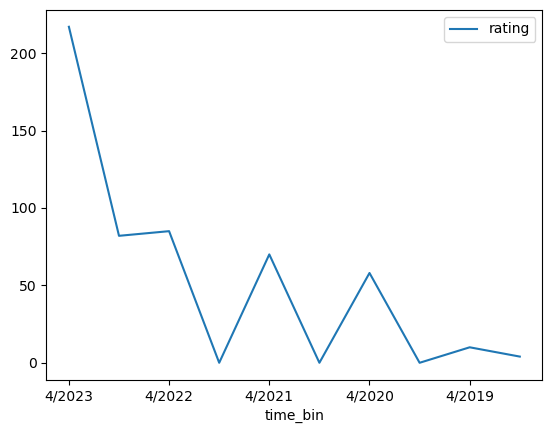

In [287]:
count_review_time.plot()

In [288]:
def sentimentreview(rating):
    if rating < 4:
        return "Negative"
    else:
        return "Positive"  

In [289]:
pd_data['sentiment']=pd_data['rating'].apply(sentimentreview)

In [291]:
pd_data.head()

,name_comment,rating,review,days ago,lang,time_bin,sentiment
0,gautham kalyan,5,"I visited this hospital to do a pregnancy test for my wife. I was worried about the communication and price. But, they assigned a separate translator for us and the guy was so dedicated and he was with us till we leave that hospital. And the price is very less when compared to other hospitals in Hanoi. Thanks to Kevin and the Hospital.",210,en,10/2022,Positive
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a bad option. Foreigners, beware! This hospital has a totally different price list for non-Vietnamese patients. We were told 3 different prices while being consulted by different cashiers for the same procedure. Despite charging foreigners 2x-3x prices for domestic clients, all the paperwork can be only in Vietnamese. Their cashiers and receptionists are also not as nice as in Vinmec.",300,en,10/2022,Negative
2,Angie Viv,3,"The hospital is quite big with new equipments.\nHowever, they charge extra fee for the foreigners, while the service is not as good as other hospitals.\nIf you do not live nearby or it is not too urgent, I will rather go to Vinmec, Hong Ngoc...",730,en,4/2021,Negative
3,JimmY Aldrich,2,"The garden and the cleanliness is the only nice thing about this place. They asked for more money for my son's treatment because he has a foreign name (born in VN with a VN passport). They tried to make my wife and son separated (my son is 3 months old), then tried to charge for VIP rooms when there were plenty of other normal rooms. They finally tried to delay payment for my wife's insurance. So if you are INSURED, HAVE YOUNG CHILDREN, STAY OVERNIGHT, ARE A FOREIGNER I would avoid this place.",1095,en,4/2020,Negative
4,carl davies,5,I'm a foreigner who got surgery on my shoulder here. The services and facilities were excellent and it was very well priced. Highly recommended to any foreigner. I will go back every time I have a problem (I live in Hanoi).,1460,en,4/2019,Positive


In [293]:
pd_data.to_csv('phuongdong_reviews.xlsx', index = False)

# SENTIMENT ANALYSIS

## Sentiment analysis of foreigner patients

In [34]:
pd_foreigner = pd_copy[pd_copy['lang']=='en']

In [35]:
pd_foreigner.shape

(12, 5)

In [36]:
import re

In [37]:
#create a function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt):     
    r = re.findall('@[\w]*', input_txt)     
    for i in r:         
        input_txt = re.sub(i, '', input_txt)              
    return input_txt

In [38]:
pd.set_option('mode.chained_assignment', None) #Turning off the warning SettingWithCopy
pd_foreigner['review']= pd_foreigner['review'].apply(remove_pattern)

In [39]:
pd_foreigner.head()

,name_comment,rating,review,days ago,lang
0,gautham kalyan,5,I visited this hospital to do a pregnancy test...,210,en
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a b...",300,en
2,Angie Viv,3,The hospital is quite big with new equipments....,730,en
3,JimmY Aldrich,2,The garden and the cleanliness is the only nic...,1095,en
4,carl davies,5,I'm a foreigner who got surgery on my shoulder...,1460,en


In [40]:
#Remove Punctuation and Stopwords
#let’s get all the punctuation.
import string
import nltk
punctuation = string.punctuation
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hantt3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
def stop_punc(review):
    review_punc_removed = [char for char in review if char not in punctuation]
    review_punc_removed_join = ''.join(review_punc_removed)
    review_punc_removed_join_stopwords = [word for word in review_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    review_clean = ' '.join(review_punc_removed_join_stopwords)
    return review_clean

In [42]:
pd_foreigner['review_clean'] = pd_foreigner['review'].apply(stop_punc)

In [43]:
pd_foreigner['review_clean']

0      visited hospital pregnancy test wife worried c...
1      Vietnamese hospital isn’t bad option Foreigner...
2      hospital quite big new equipments However char...
3      garden cleanliness nice thing place asked mone...
4      Im foreigner got surgery shoulder services fac...
6      Price covid test sometimes 150 sometimes 200 s...
9                                           Good service
11                                         Good services
12                                          Good service
13                                            Good place
247    went regular company checkup today Local hospi...
255    went get health checkup company visa issue see...
Name: review_clean, dtype: object

In [44]:
#Case Normalization
pd_foreigner['review_clean'] = pd_foreigner['review_clean'].str.lower()

In [45]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [46]:
pd_foreigner['review_tokenized'] = pd_foreigner['review_clean'].apply(lambda x: tokenization(x.lower()))

In [47]:
pd_foreigner.head()

,name_comment,rating,review,days ago,lang,review_clean,review_tokenized
0,gautham kalyan,5,I visited this hospital to do a pregnancy test...,210,en,visited hospital pregnancy test wife worried c...,"[visited, hospital, pregnancy, test, wife, wor..."
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a b...",300,en,vietnamese hospital isn’t bad option foreigner...,"[vietnamese, hospital, isn, t, bad, option, fo..."
2,Angie Viv,3,The hospital is quite big with new equipments....,730,en,hospital quite big new equipments however char...,"[hospital, quite, big, new, equipments, howeve..."
3,JimmY Aldrich,2,The garden and the cleanliness is the only nic...,1095,en,garden cleanliness nice thing place asked mone...,"[garden, cleanliness, nice, thing, place, aske..."
4,carl davies,5,I'm a foreigner who got surgery on my shoulder...,1460,en,im foreigner got surgery shoulder services fac...,"[im, foreigner, got, surgery, shoulder, servic..."


In [48]:
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hantt3\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hantt3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
#Lemmatization
pd_foreigner['review_lem'] = pd_foreigner['review_tokenized'].apply(lambda x: lemmatizer(x))

In [52]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [53]:
from textblob import TextBlob

In [54]:
# Function for polarity score
def polarity(review):
    return TextBlob(review).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [55]:
pd_foreigner['Polarity'] = pd_foreigner['review_lem'].apply(polarity)

In [56]:
pd_foreigner['Sentiment'] = pd_foreigner['Polarity'].apply(sentimenttextblob)

In [57]:
pd_foreigner['Sentiment'].value_counts()

Positive    11
Negative     1
Name: Sentiment, dtype: int64

In [58]:
pd.set_option("display.max_colwidth", -1)

C:\Users\hantt3\AppData\Local\Temp\ipykernel_13796\2475433900.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [59]:
pd_foreigner[pd_foreigner['rating']==1]

,name_comment,rating,review,days ago,lang,review_clean,review_tokenized,review_lem,Polarity,Sentiment
6,Kacper Stepien,1,"Price of covid test sometimes 150, sometimes 200, sometimes 300. Prices higher for foreigners, avoid at all costs",365,en,price covid test sometimes 150 sometimes 200 sometimes 300 prices higher foreigners avoid costs,"[price, covid, test, sometimes, 150, sometimes, 200, sometimes, 300, prices, higher, foreigners, avoid, costs]",price covid test sometimes 150 sometimes 200 sometimes 300 price higher foreigner avoid cost,0.25,Positive
255,IMYMEMINE !,1,"I went to get a health checkup during my company visa issue.\n\nI can see the veins well, so I've never felt any pain while drawing blood, but here it hurts from the moment I first put the needle in, the moment the blood is drawn, and the moment the needle is pulled out. It hurt until\n\nI turned my head and didn't know it was hit, but there are two stab wounds. The needle is really just inserted. Can I do this? I don't put it in as slowly as I want it to, I just plug it in. There was no process of squeezing to show blood. He's a male nurse, but he's rude.\n\nOther than that, the treatment is very rude, and even some male doctors and male nurses are beautiful girls.. Can't we just let the Korean interpreter stay here? It's not a speculation.\n\nIt's nice to have a Korean interpreter.",365,en,went get health checkup company visa issue see veins well ive never felt pain drawing blood hurts moment first put needle moment blood drawn moment needle pulled hurt turned head didnt know hit two stab wounds needle really inserted dont put slowly want plug process squeezing show blood hes male nurse hes rude treatment rude even male doctors male nurses beautiful girls cant let korean interpreter stay speculation nice korean interpreter,"[went, get, health, checkup, company, visa, issue, see, veins, well, ive, never, felt, pain, drawing, blood, hurts, moment, first, put, needle, moment, blood, drawn, moment, needle, pulled, hurt, turned, head, didnt, know, hit, two, stab, wounds, needle, really, inserted, dont, put, slowly, want, plug, process, squeezing, show, blood, hes, male, nurse, hes, rude, treatment, rude, even, male, doctors, male, nurses, beautiful, girls, cant, let, korean, interpreter, stay, speculation, nice, korean, interpreter]",went get health checkup company visa issue see vein well ive never felt pain drawing blood hurt moment first put needle moment blood drawn moment needle pulled hurt turned head didnt know hit two stab wound needle really inserted dont put slowly want plug process squeezing show blood he male nurse he rude treatment rude even male doctor male nurse beautiful girl cant let korean interpreter stay speculation nice korean interpreter,0.10,Positive


In [60]:
pd_foreigner[pd_foreigner['rating']==2]

,name_comment,rating,review,days ago,lang,review_clean,review_tokenized,review_lem,Polarity,Sentiment
3,JimmY Aldrich,2,"The garden and the cleanliness is the only nice thing about this place. They asked for more money for my son's treatment because he has a foreign name (born in VN with a VN passport). They tried to make my wife and son separated (my son is 3 months old), then tried to charge for VIP rooms when there were plenty of other normal rooms. They finally tried to delay payment for my wife's insurance. So if you are INSURED, HAVE YOUNG CHILDREN, STAY OVERNIGHT, ARE A FOREIGNER I would avoid this place.",1095,en,garden cleanliness nice thing place asked money sons treatment foreign name born vn vn passport tried make wife son separated son 3 months old tried charge vip rooms plenty normal rooms finally tried delay payment wifes insurance insured young children stay overnight foreigner would avoid place,"[garden, cleanliness, nice, thing, place, asked, money, sons, treatment, foreign, name, born, vn, vn, passport, tried, make, wife, son, separated, son, 3, months, old, tried, charge, vip, rooms, plenty, normal, rooms, finally, tried, delay, payment, wifes, insurance, insured, young, children, stay, overnight, foreigner, would, avoid, place]",garden cleanliness nice thing place asked money son treatment foreign name born vn vn passport tried make wife son separated son 3 month old tried charge vip room plenty normal room finally tried delay payment wife insurance insured young child stay overnight foreigner would avoid place,0.1375,Positive


In [61]:
pd_foreigner[pd_foreigner['rating']==3]

,name_comment,rating,review,days ago,lang,review_clean,review_tokenized,review_lem,Polarity,Sentiment
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a bad option. Foreigners, beware! This hospital has a totally different price list for non-Vietnamese patients. We were told 3 different prices while being consulted by different cashiers for the same procedure. Despite charging foreigners 2x-3x prices for domestic clients, all the paperwork can be only in Vietnamese. Their cashiers and receptionists are also not as nice as in Vinmec.",300,en,vietnamese hospital isn’t bad option foreigners beware hospital totally different price list nonvietnamese patients told 3 different prices consulted different cashiers procedure despite charging foreigners 2x3x prices domestic clients paperwork vietnamese cashiers receptionists also nice vinmec,"[vietnamese, hospital, isn, t, bad, option, foreigners, beware, hospital, totally, different, price, list, nonvietnamese, patients, told, 3, different, prices, consulted, different, cashiers, procedure, despite, charging, foreigners, 2x3x, prices, domestic, clients, paperwork, vietnamese, cashiers, receptionists, also, nice, vinmec]",vietnamese hospital isn t bad option foreigner beware hospital totally different price list nonvietnamese patient told 3 different price consulted different cashier procedure despite charging foreigner 2x3x price domestic client paperwork vietnamese cashier receptionist also nice vinmec,-0.016667,Negative
2,Angie Viv,3,"The hospital is quite big with new equipments.\nHowever, they charge extra fee for the foreigners, while the service is not as good as other hospitals.\nIf you do not live nearby or it is not too urgent, I will rather go to Vinmec, Hong Ngoc...",730,en,hospital quite big new equipments however charge extra fee foreigners service good hospitals live nearby urgent rather go vinmec hong ngoc,"[hospital, quite, big, new, equipments, however, charge, extra, fee, foreigners, service, good, hospitals, live, nearby, urgent, rather, go, vinmec, hong, ngoc]",hospital quite big new equipment however charge extra fee foreigner service good hospital live nearby urgent rather go vinmec hong ngoc,0.194545,Positive


We see that the sentiment for polarity score around 0.13 is regarded as Positive, so we may need to adjust the sentiment type. 
In this case, I will use the rating as the polarity for sentiment as it is more accurate. I set review 1,2,3 as negative and the rest for positive. 

In [62]:
def sentimentreview(rating):
    if rating < 4:
        return "Negative"
    else:
        return "Positive"  

In [63]:
pd_foreigner['Sentiment'] = pd_foreigner['rating'].apply(sentimentreview)


In [64]:
pd_foreigner.head()

,name_comment,rating,review,days ago,lang,review_clean,review_tokenized,review_lem,Polarity,Sentiment
0,gautham kalyan,5,"I visited this hospital to do a pregnancy test for my wife. I was worried about the communication and price. But, they assigned a separate translator for us and the guy was so dedicated and he was with us till we leave that hospital. And the price is very less when compared to other hospitals in Hanoi. Thanks to Kevin and the Hospital.",210,en,visited hospital pregnancy test wife worried communication price assigned separate translator us guy dedicated us till leave hospital price less compared hospitals hanoi thanks kevin hospital,"[visited, hospital, pregnancy, test, wife, worried, communication, price, assigned, separate, translator, us, guy, dedicated, us, till, leave, hospital, price, less, compared, hospitals, hanoi, thanks, kevin, hospital]",visited hospital pregnancy test wife worried communication price assigned separate translator u guy dedicated u till leave hospital price le compared hospital hanoi thanks kevin hospital,0.200000,Positive
1,Anm 7968,3,"If you are Vietnamese, this hospital isn’t a bad option. Foreigners, beware! This hospital has a totally different price list for non-Vietnamese patients. We were told 3 different prices while being consulted by different cashiers for the same procedure. Despite charging foreigners 2x-3x prices for domestic clients, all the paperwork can be only in Vietnamese. Their cashiers and receptionists are also not as nice as in Vinmec.",300,en,vietnamese hospital isn’t bad option foreigners beware hospital totally different price list nonvietnamese patients told 3 different prices consulted different cashiers procedure despite charging foreigners 2x3x prices domestic clients paperwork vietnamese cashiers receptionists also nice vinmec,"[vietnamese, hospital, isn, t, bad, option, foreigners, beware, hospital, totally, different, price, list, nonvietnamese, patients, told, 3, different, prices, consulted, different, cashiers, procedure, despite, charging, foreigners, 2x3x, prices, domestic, clients, paperwork, vietnamese, cashiers, receptionists, also, nice, vinmec]",vietnamese hospital isn t bad option foreigner beware hospital totally different price list nonvietnamese patient told 3 different price consulted different cashier procedure despite charging foreigner 2x3x price domestic client paperwork vietnamese cashier receptionist also nice vinmec,-0.016667,Negative
2,Angie Viv,3,"The hospital is quite big with new equipments.\nHowever, they charge extra fee for the foreigners, while the service is not as good as other hospitals.\nIf you do not live nearby or it is not too urgent, I will rather go to Vinmec, Hong Ngoc...",730,en,hospital quite big new equipments however charge extra fee foreigners service good hospitals live nearby urgent rather go vinmec hong ngoc,"[hospital, quite, big, new, equipments, however, charge, extra, fee, foreigners, service, good, hospitals, live, nearby, urgent, rather, go, vinmec, hong, ngoc]",hospital quite big new equipment however charge extra fee foreigner service good hospital live nearby urgent rather go vinmec hong ngoc,0.194545,Negative
3,JimmY Aldrich,2,"The garden and the cleanliness is the only nice thing about this place. They asked for more money for my son's treatment because he has a foreign name (born in VN with a VN passport). They tried to make my wife and son separated (my son is 3 months old), then tried to charge for VIP rooms when there were plenty of other normal rooms. They finally tried to delay payment for my wife's insurance. So if you are INSURED, HAVE YOUNG CHILDREN, STAY OVERNIGHT, ARE A FOREIGNER I would avoid this place.",1095,en,garden cleanliness nice thing place asked money sons treatment foreign name born vn vn passport tried make wife son separated son 3 months old tried charge vip rooms plenty normal rooms finally tried delay payment wifes insurance insured young children stay overnight f

Text(0, 0.5, 'Number of reviews')

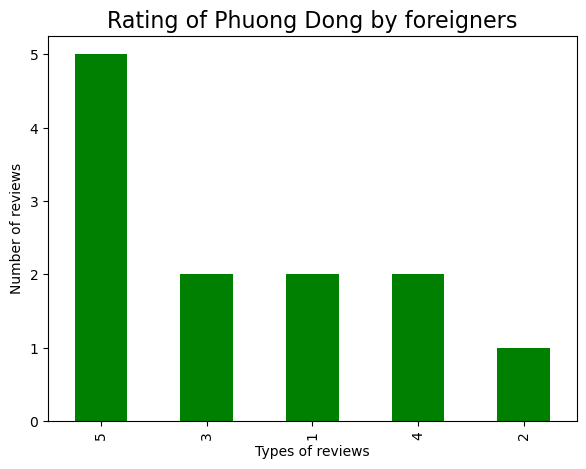

In [65]:
plt.subplot(1,2,1)
pd_foreigner['rating'].value_counts().plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Rating of Phuong Dong by foreigners', fontsize=16)
plt.xlabel('Types of reviews')
plt.ylabel('Number of reviews')

In [66]:
!pip install wordcloud

In [67]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [68]:
data_string = pd_foreigner['review_lem'].tolist()
data_string = " ".join(data_string)

In [69]:
#A function to generate the word cloud from text
def generate_wordcloud(data, title, stopwords, color, bcolor):
    cloud = WordCloud(width=7000,
                      height=5000,
                      max_words=100,
                      colormap=color,
                      background_color=bcolor,
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

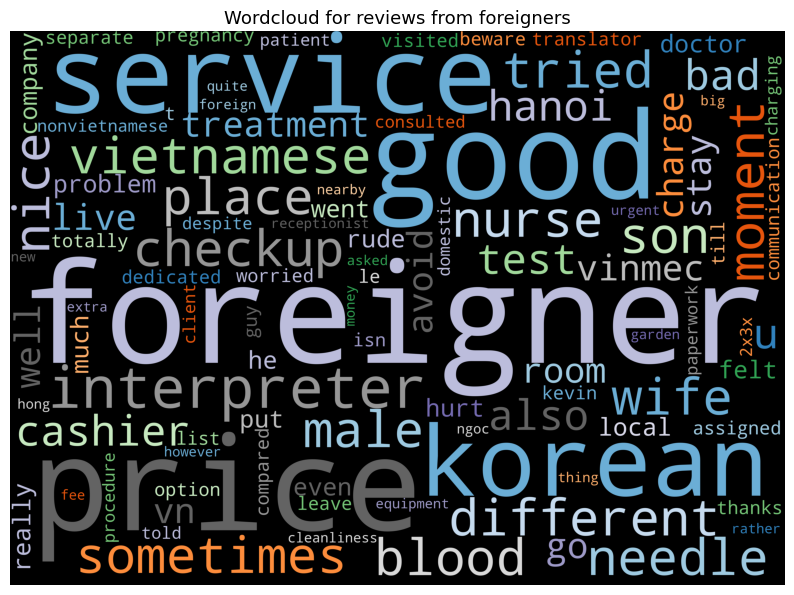

In [70]:
generate_wordcloud(data_string, 'Wordcloud for reviews from foreigners',['hospital'], 'tab20c', 'black')

In [78]:
#separate the positive and negative reviews
negative_foreigner = pd_foreigner[pd_foreigner['Sentiment']=='Negative']
negative_string = negative_foreigner['review_lem'].tolist()
negative_string = " ".join(negative_string)


In [80]:
positive_foreigner = pd_foreigner[pd_foreigner['Sentiment']=='Positive']
positive_string = positive_foreigner['review_lem'].tolist()
positive_string = " ".join(positive_string)

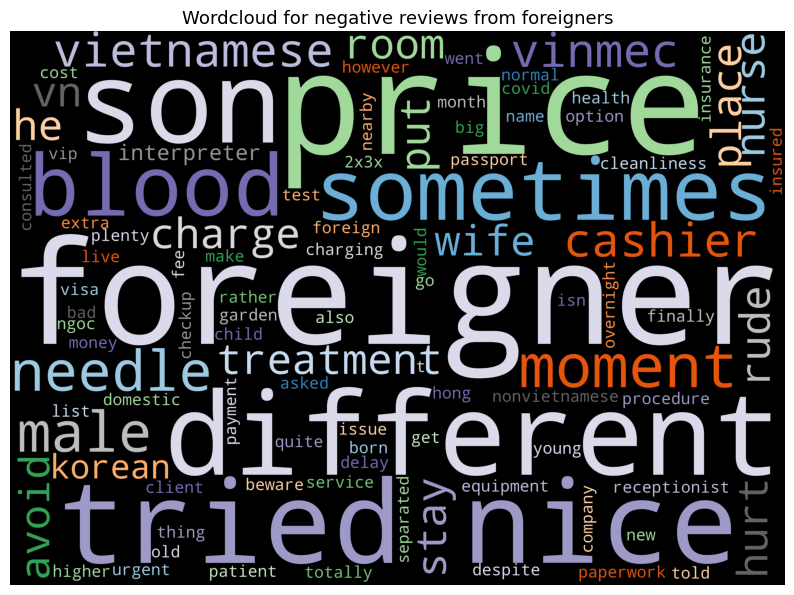

In [81]:
generate_wordcloud(negative_string, 'Wordcloud for negative reviews from foreigners',['hospital', 'good'], 'tab20c', 'black')

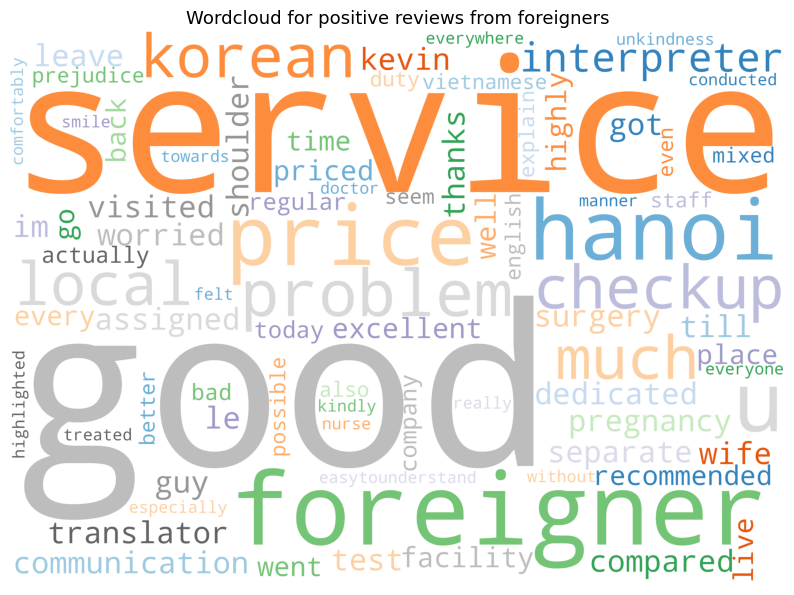

In [82]:
generate_wordcloud(positive_string, 'Wordcloud for positive reviews from foreigners',['hospital'], 'tab20c', 'white')

## Sentiment analysis of Vietnamese patients

In [99]:
pd_vietnamese = pd_copy[pd_copy['lang']=='vi']


In [100]:
pd_vietnamese.head()

,name_comment,rating,review,days ago,lang
14,Trang Huyen,5,"Mình mới có trải nghiệm dịch vụ đi sinh như đi nghỉ dưỡng ở viện. Đúng như lời đồn 🤩\nẤn tượng đầu tiên là khuôn viên xanh mát, dễ chịu, chỗ để xe rộng rãi. Tiếp đến là thái độ phục vụ của nhân viên và các y bác sĩ rất nhiệt tình và hỗ trợ nhanh từ ngoài sảnh vào trong khoa khi mình cần.\nBác sĩ khám nhẹ nhàng, giúp mình theo dõi thai kì tốt.\nĐi sinh mẹ khoẻ con khoẻ, cơm viện cho mẹ rất ngon, đủ chất, sạch sẽ được bọc cẩn thận, các bữa ăn gửi đến cho mẹ rất đúng giờ.\nPhòng nghỉ sau sinh của viện rất sạch sẽ, mỗi ngày đều có các cô đến thay ga giường, thay váy mới cho mẹ, dọn dẹp lau phòng sạch sẽ. Trong phòng có đầy đủ các máy móc hỗ trợ mẹ và bé rất tiện.\nTóm lại đây là lần đầu đi sinh, mình chọn trải nghiệm ở BVĐK Phương Đông là lựa chọn sáng suốt. Ưng từ lúc đến cho đến khi ra về, mọi thủ tục nhanh chóng. Với mức giá sinh mổ lần đầu mình săn sale giảm 45% khi ra viện thanh toán tổng tất cả 23.000.000 thì ko còn đòi hỏi gì hơn.\nHơi tiếc vì ko dc quay video vượt cạn 😭 trong gói mình được miễn phí mà chọn sinh mổ lúc 13h, nv báo giờ đó bên quay phim họ nghỉ trưa nên ko quay dc lúc mình sinh. Sẽ quay lúc bố đón bé và lúc tắm bé. Nhưng mình về hỏi thì thấy chồng bảo ko dc quay lúc bố đón, trong khi có 1 nhà ra trước lại được quay 😭 hôm sau thì quay được lúc tắm bé, đang ngóng chờ video ạ.\n(À có điều này chưa ưng lắm ở bạn tư vấn viên, ban đầu mình hỏi tham khảo gói khám, mình chưa đăng kí ngay. Thời gian sau mình thấy có ưu đãi tốt hơn nên mình quay lại đăng kí thì thấy bị huỷ kết bạn 😂 cái này hơi hụt hẫng nhưng thôi cũng ko sao, sau đó thì bạn vẫn hỗ trợ mình rất nhiệt tình)\nNếu có sinh tiếp thì mình cũng vẫn sẽ chọn BVĐK Phương Đông. Mong rằng viện vẫn sẽ và luôn đem đến những trải nghiệm tuyệt vời hơn nữa cho người dùng.",30,vi
15,Mẹ 3 con,5,"Bệnh viện sang xịn mịn. Thích cái khuôn viên xanh khiến m có cảm giác như đang đi công viên hoặc khu nghỉ dưỡng chứ ko phải đi viện . về cơ bản giá cũng hợp lý, ai có bảo hiểm sức khỏe vào đây chuẩn tiết kiệm nè",210,vi
16,Cu Le,5,"Dịch vụ của bệnh viện ngày càng tốt hơn, càng chuyên nghiệp khách hàng là bệnh nhân. Đặc biệt có hệ thống bảo hiểm, bảo lãnh y tế tiện lợi cho người bệnh nhanh chóng, tiện ích",210,vi
17,Tạ Đại Hải,3,"Đã từng trải nghiệm các dịch vụ ở các bệnh viện tư nên mình mạnh dạn đánh giá 3 sao, bệnh viện cần cải thiện và lấy ý kiến khách hàng để từng bức nâng cao chất lượng dịch vụ hơn nữa👌 …",210,vi
18,Khanh Linh Nguyen,5,"Bệnh viện có chính sách chăm sóc khách hàng tốt, view đẹp, nhiều phòng lưu viện với các mức phí khác nhau mình cảm thấy khá là phù hợp với nhu cầu của các mẹ bầu.",28,vi


In [101]:
pd_vietnamese['review']= pd_vietnamese['review'].apply(remove_pattern)

In [102]:
pd_vietnamese.head()

,name_comment,rating,review,days ago,lang
14,Trang Huyen,5,"Mình mới có trải nghiệm dịch vụ đi sinh như đi nghỉ dưỡng ở viện. Đúng như lời đồn 🤩\nẤn tượng đầu tiên là khuôn viên xanh mát, dễ chịu, chỗ để xe rộng rãi. Tiếp đến là thái độ phục vụ của nhân viên và các y bác sĩ rất nhiệt tình và hỗ trợ nhanh từ ngoài sảnh vào trong khoa khi mình cần.\nBác sĩ khám nhẹ nhàng, giúp mình theo dõi thai kì tốt.\nĐi sinh mẹ khoẻ con khoẻ, cơm viện cho mẹ rất ngon, đủ chất, sạch sẽ được bọc cẩn thận, các bữa ăn gửi đến cho mẹ rất đúng giờ.\nPhòng nghỉ sau sinh của viện rất sạch sẽ, mỗi ngày đều có các cô đến thay ga giường, thay váy mới cho mẹ, dọn dẹp lau phòng sạch sẽ. Trong phòng có đầy đủ các máy móc hỗ trợ mẹ và bé rất tiện.\nTóm lại đây là lần đầu đi sinh, mình chọn trải nghiệm ở BVĐK Phương Đông là lựa chọn sáng suốt. Ưng từ lúc đến cho đến khi ra về, mọi thủ tục nhanh chóng. Với mức giá sinh mổ lần đầu mình săn sale giảm 45% khi ra viện thanh toán tổng tất cả 23.000.000 thì ko còn đòi hỏi gì hơn.\nHơi tiếc vì ko dc quay video vượt cạn 😭 trong gói mình được miễn phí mà chọn sinh mổ lúc 13h, nv báo giờ đó bên quay phim họ nghỉ trưa nên ko quay dc lúc mình sinh. Sẽ quay lúc bố đón bé và lúc tắm bé. Nhưng mình về hỏi thì thấy chồng bảo ko dc quay lúc bố đón, trong khi có 1 nhà ra trước lại được quay 😭 hôm sau thì quay được lúc tắm bé, đang ngóng chờ video ạ.\n(À có điều này chưa ưng lắm ở bạn tư vấn viên, ban đầu mình hỏi tham khảo gói khám, mình chưa đăng kí ngay. Thời gian sau mình thấy có ưu đãi tốt hơn nên mình quay lại đăng kí thì thấy bị huỷ kết bạn 😂 cái này hơi hụt hẫng nhưng thôi cũng ko sao, sau đó thì bạn vẫn hỗ trợ mình rất nhiệt tình)\nNếu có sinh tiếp thì mình cũng vẫn sẽ chọn BVĐK Phương Đông. Mong rằng viện vẫn sẽ và luôn đem đến những trải nghiệm tuyệt vời hơn nữa cho người dùng.",30,vi
15,Mẹ 3 con,5,"Bệnh viện sang xịn mịn. Thích cái khuôn viên xanh khiến m có cảm giác như đang đi công viên hoặc khu nghỉ dưỡng chứ ko phải đi viện . về cơ bản giá cũng hợp lý, ai có bảo hiểm sức khỏe vào đây chuẩn tiết kiệm nè",210,vi
16,Cu Le,5,"Dịch vụ của bệnh viện ngày càng tốt hơn, càng chuyên nghiệp khách hàng là bệnh nhân. Đặc biệt có hệ thống bảo hiểm, bảo lãnh y tế tiện lợi cho người bệnh nhanh chóng, tiện ích",210,vi
17,Tạ Đại Hải,3,"Đã từng trải nghiệm các dịch vụ ở các bệnh viện tư nên mình mạnh dạn đánh giá 3 sao, bệnh viện cần cải thiện và lấy ý kiến khách hàng để từng bức nâng cao chất lượng dịch vụ hơn nữa👌 …",210,vi
18,Khanh Linh Nguyen,5,"Bệnh viện có chính sách chăm sóc khách hàng tốt, view đẹp, nhiều phòng lưu viện với các mức phí khác nhau mình cảm thấy khá là phù hợp với nhu cầu của các mẹ bầu.",28,vi


For removing stopwords in Vietnamese, I use file vietnamese stopwords txt file from https://github.com/stopwords/vietnamese-stopwords. 


In [103]:
#load the vietnamse stopword txt file
vi_stopwords = open("C://Users//hantt3//Documents//vietnamese_stopwords.txt", "r", encoding = 'UTF-8')

In [104]:
data= vi_stopwords.read()

In [105]:
data_into_list = data.split("\n")
print(data_into_list)

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán', 'bán_cấp', 'bán_dạ', 'bán_thế', 'bây_bẩy', 'bây_chừ', 'bây_giờ', 'bây_nhiêu', 'bèn', 'béng', 'bên', 'bên_bị', 'bên_có', 'bên_cạnh', 'bông', 'bước', 'bước_khỏi', 'bước_tới', 'bước_đi', 'bạn', 'bản', 'bản_bộ', 'bản_riêng', 'bản_thân', 'bản_ý', 'bất_chợt', 'bất_cứ', 'bất_giác', 'bất_kì', 'bất_kể', 'bất_kỳ', 'bất_luận', 'bất_ngờ', 'bất_nhược', 'bất_quá', 'bất_quá_chỉ', 'bất_thình_lình', 'bất_tử', 'bất_đồ', 'bấy', 'bấy_chầy', 'bấy_chừ', 'bấy_giờ', 'bấy_lâu', 'bấy_lâ

In [106]:
pd_vietnamese['review'] = pd_vietnamese['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (data_into_list)]))

In [143]:
def stop_punc(review):
    review_punc_removed = [char for char in review if char not in punctuation]
    review_punc_removed_join = ''.join(review_punc_removed)
    review_punc_removed_join_stopwords = [word for word in review_punc_removed_join.split() if word.lower() not in data_into_list]
    review_clean = ' '.join(review_punc_removed_join_stopwords)
    return review_clean

In [144]:
pd_vietnamese['review'] = pd_vietnamese['review'].apply(stop_punc)

In [115]:
pd_vietnamese['Sentiment'] = pd_vietnamese['rating'].apply(sentimentreview)

In [145]:
pd_vietnamese.head()

,name_comment,rating,review,days ago,lang,Sentiment
14,Trang Huyen,5,trải nghiệm dịch vụ đi sinh đi nghỉ dưỡng viện đồn 🤩 Ấn tượng đầu tiên khuôn viên xanh mát chỗ xe rộng rãi Tiếp thái độ phục vụ nhân viên y sĩ nhiệt tình hỗ trợ sảnh khoa sĩ khám nhẹ nhàng giúp dõi thai kì Đi sinh mẹ khoẻ khoẻ cơm viện mẹ ngon chất sạch bọc cẩn thận bữa gửi mẹ Phòng nghỉ sinh viện sạch thay ga giường thay váy mẹ dọn dẹp lau phòng sạch phòng máy móc hỗ trợ mẹ bé tiện Tóm đầu đi sinh trải nghiệm BVĐK Phương Đông lựa suốt Ưng thủ tục chóng giá sinh mổ đầu săn sale 45 viện toán tổng tất 23000000 ko đòi Hơi tiếc ko dc video cạn 😭 gói miễn phí sinh mổ 13h nv báo phim nghỉ trưa ko dc sinh bố đón bé tắm bé chồng bảo ko dc bố đón 1 😭 hôm tắm bé ngóng chờ video ưng lắm tư vấn viên ban đầu tham khảo gói khám đăng kí Thời gian ưu đãi đăng kí huỷ kết 😂 hơi hụt hẫng ko hỗ trợ nhiệt tình sinh tiếp BVĐK Phương Đông Mong viện đem trải nghiệm tuyệt vời,30,vi,Positive
15,Mẹ 3 con,5,Bệnh viện xịn mịn khuôn viên xanh m cảm giác đi công viên khu nghỉ dưỡng ko đi viện giá hợp lý bảo hiểm sức khỏe chuẩn tiết kiệm nè,210,vi,Positive
16,Cu Le,5,Dịch vụ bệnh viện chuyên nghiệp hàng bệnh nhân Đặc biệt hệ thống bảo hiểm bảo lãnh y tế tiện lợi bệnh chóng tiện ích,210,vi,Positive
17,Tạ Đại Hải,3,trải nghiệm dịch vụ bệnh viện tư dạn đánh giá 3 bệnh viện cải thiện kiến hàng nâng chất dịch vụ nữa👌 …,210,vi,Negative
18,Khanh Linh Nguyen,5,Bệnh viện sách chăm sóc hàng view đẹp phòng lưu viện phí cảm phù hợp nhu cầu mẹ bầu,28,vi,Positive


### WordCloud

In [219]:
#separate the positive and negative reviews
negative_vietnamese = pd_vietnamese[pd_vietnamese['Sentiment']=='Negative']
negative_string = negative_vietnamese['review'].tolist()
negative_string = " ".join(negative_string)

In [220]:
positive_vietnamese = pd_vietnamese[pd_vietnamese['Sentiment']=='Positive']
positive_string = positive_vietnamese['review'].tolist()
positive_string = " ".join(positive_string)

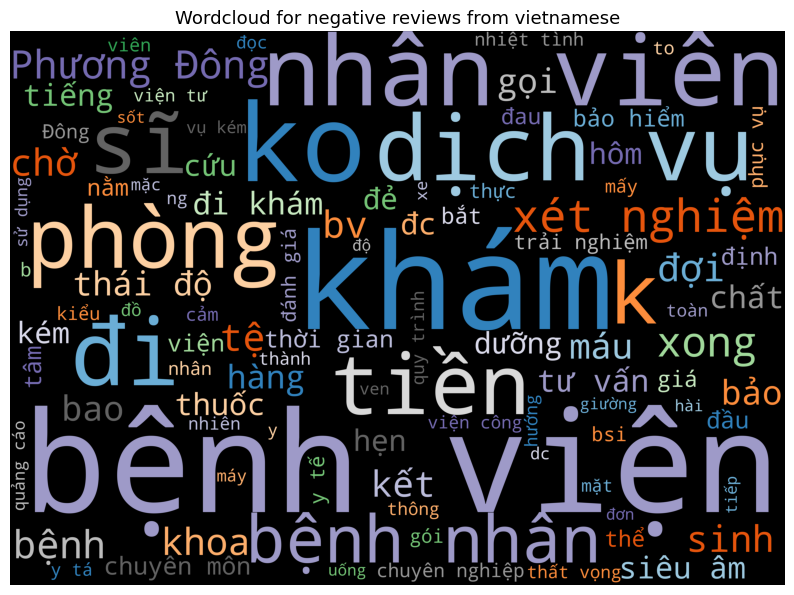

In [123]:
generate_wordcloud(negative_string, 'Wordcloud for negative reviews from vietnamese',data_into_list, 'tab20c', 'black')

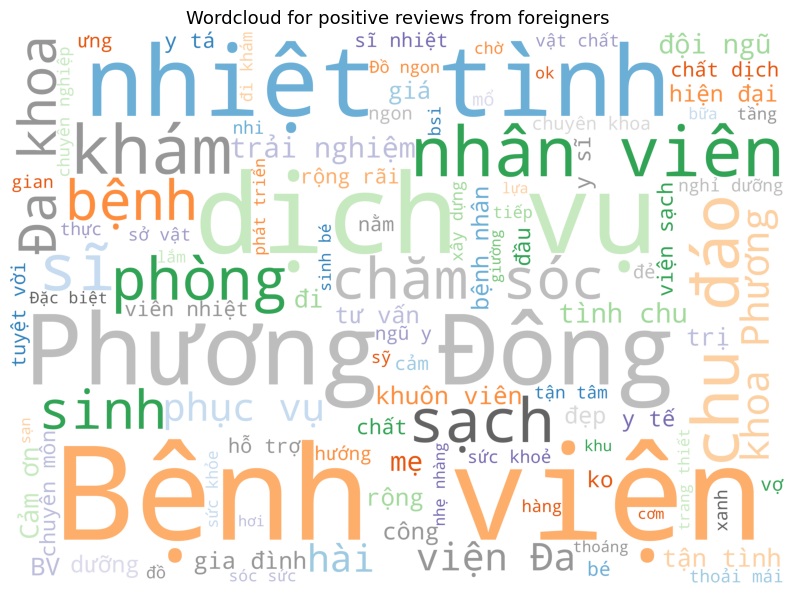

In [126]:
generate_wordcloud(positive_string, 'Wordcloud for positive reviews from foreigners',data_into_list, 'tab20c', 'white')

#### Barplot the highest occurring words

In [131]:
from underthesea import word_tokenize 


In [221]:
positive_vietnamese["review_tokenize"] = positive_vietnamese["review"].apply(lambda x: word_tokenize(x))

In [222]:
positive_tokenize = positive_vietnamese["review_tokenize"].tolist()
list_pos_vi = positive_tokenize

In [223]:
#flatten list 
import itertools
list_pos_vi = list(itertools.chain(*list_pos_vi))
print(list_pos_vi)

['trải nghiệm', 'dịch vụ', 'đi', 'sinh', 'đi', 'nghỉ', 'dưỡng', 'viện', 'đồn', '🤩', 'Ấn tượng', 'đầu tiên', 'khuôn viên', 'xanh', 'mát', 'chỗ', 'xe', 'rộng rãi', 'Tiếp', 'thái độ', 'phục vụ', 'nhân viên', 'y sĩ', 'nhiệt tình', 'hỗ trợ', 'sảnh', 'khoa', 'sĩ', 'khám', 'nhẹ nhàng', 'giúp', 'dõi', 'thai', 'kì', 'Đi', 'sinh', 'mẹ', 'khỏe', 'khỏe', 'cơm', 'viện', 'mẹ', 'ngon', 'chất', 'sạch', 'bọc', 'cẩn thận', 'bữa', 'gửi', 'mẹ', 'Phòng', 'nghỉ', 'sinh', 'viện', 'sạch', 'thay', 'ga', 'giường', 'thay', 'váy', 'mẹ', 'dọn dẹp', 'lau', 'phòng', 'sạch', 'phòng', 'máy móc', 'hỗ trợ', 'mẹ', 'bé', 'tiện', 'Tóm', 'đầu', 'đi', 'sinh', 'trải nghiệm', 'BVĐK', 'Phương Đông', 'lựa', 'suốt', 'Ưng', 'thủ tục', 'chóng', 'giá', 'sinh', 'mổ', 'đầu', 'săn', 'sale', '45', 'viện', 'toán', 'tổng', 'tất', '23000000', 'ko', 'đòi', 'Hơi', 'tiếc', 'ko', 'dc', 'video', 'cạn', '😭', 'gói', 'miễn phí', 'sinh', 'mổ', '13', 'h', 'nv', 'báo', 'phim', 'nghỉ', 'trưa', 'ko', 'dc', 'sinh', 'bố', 'đón', 'bé', 'tắm', 'bé', 'chồng

In [224]:
#remove some unwanted words
unwanted = {'bệnh viện', 'Bệnh viện', 'Phương Đông', 'đi', 'viện', 'bệnh'}
list_pos_vi =[e for e in list_pos_vi if e not in unwanted]


In [225]:
#remove all numbers
list_pos_vi =[e for e in list_pos_vi if not e.isdigit()]

In [296]:
##top 20 words on phương đông positive reviews
freq_dis_pos = nltk.FreqDist(list_pos_vi) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())}) #data frame of words and count

In [297]:
# selecting top 20 most frequent words
freq_dataframe_pos = freq_dataframe.nlargest(columns='Count', n = 20)

In [298]:
# selecting top 200 most frequent words
freq_dataframe_pos = freq_dataframe.nlargest(columns='Count', n = 200)

In [228]:
freq_dataframe_pos

,Words,Count
20,nhiệt tình,84
1,dịch vụ,76
25,khám,76
37,sạch,67
278,chu đáo,55
121,Dịch vụ,50
24,sĩ,49
2,sinh,44
18,nhân viên,44
132,chăm sóc,41


In [250]:
negative_vietnamese["review_tokenize"] = negative_vietnamese["review"].apply(lambda x: word_tokenize(x))

In [251]:
negative_tokenize = negative_vietnamese["review_tokenize"].tolist()
list_ne_vi = negative_tokenize

In [252]:
list_ne_vi = list(itertools.chain(*list_ne_vi))
print(list_ne_vi)

['trải nghiệm', 'dịch vụ', 'bệnh viện', 'tư', 'dạn', 'đánh giá', '3', 'bệnh viện', 'cải thiện', 'kiến', 'hàng', 'nâng', 'chất', 'dịch vụ', 'nữa', '👌', '…', 'Chất', 'phục vụ', 'k', 'ổn', 'Nhân viên', 'chậm', 'Đặc biệt', 'phòng', 'bé', 'K', 'giường', 'nằm', 'chăm sóc', 'bệnh nhân', 'Mãi 9', 'h', 'tối', 'phát', 'giường', '6', 'h', 'thu', 'giường', 'nằm', 'vật vờ', 'đất', 'la liệt', 'hành lang', 'mỏi', 'xong', 'k', 'nhân viên', 'dọn', 'Chất', 'chấm', '5', 'cân nhắc', 'sinh đẻ', 'Bệnh viện', 'nhân viên', 'đông', 'chất', 'nhân viên', 'kém', 'Đợi', 'tiếng', 'đồng hồ', 'siêu âm', '4', 'Khám', 'sức khỏe', 'sơ sơ', 'điền', 'đơn', 'xong', 'cứu', 'giao', 'mạng BV', 'ko', 'ntn', '😡', 'ĐẦU', 'PHƯƠNG ĐÔNG', 'sức khỏe', 'đi', 'viện', 'bao', '1', 'bệnh viện', 'tư chất', 'dịch vụ', 'kém', 'Hiện', 'nằm', 'trị', 'PĐ', 'hài', '1', 'chút', '1', 'Y tá', 'chuyên môn', 'kém', 'cúm A sốt', 'liên tục', 'bầu', 'truyền', 'thuốc', '2', 'liên tiếp', 'y tá', 'ven', 'máu', 'ộc', 'xử lý', 'kịp thời', 'ven', '1', '2', '

In [253]:
list_ne_vi[:10]

['trải nghiệm',
 'dịch vụ',
 'bệnh viện',
 'tư',
 'dạn',
 'đánh giá',
 '3',
 'bệnh viện',
 'cải thiện',
 'kiến']

In [261]:
#remove some unwanted words
unwanted1 = {'bệnh viện', 'Bệnh viện', 'đi', 'viện', 'bệnh', 'ko', 'k', 'bv'}
list_ne_vi =[i for i in list_ne_vi if i not in unwanted1]

In [262]:
list_ne_vi[:10]

['trải nghiệm',
 'dịch vụ',
 'tư',
 'dạn',
 'đánh giá',
 'cải thiện',
 'kiến',
 'hàng',
 'nâng',
 'chất']

In [263]:
#remove all numbers
list_ne_vi =[e for e in list_ne_vi if not e.isdigit()]

In [264]:
list_ne_vi[:20]

['trải nghiệm',
 'dịch vụ',
 'tư',
 'dạn',
 'đánh giá',
 'cải thiện',
 'kiến',
 'hàng',
 'nâng',
 'chất',
 'dịch vụ',
 'nữa',
 '👌',
 '…',
 'Chất',
 'phục vụ',
 'ổn',
 'Nhân viên',
 'chậm',
 'Đặc biệt']

In [265]:
##top 20 words on phương đông positive reviews
freq_dis_ne = nltk.FreqDist(list_ne_vi) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_ne.keys()), 'Count': list(freq_dis_ne.values())}) #data frame of words and count

In [266]:
# selecting top 20 most frequent words
freq_dataframe_ne = freq_dataframe.nlargest(columns='Count', n = 20)

In [267]:
freq_dataframe_ne

,Words,Count
126,khám,122
153,tiền,43
37,nhân viên,42
1,dịch vụ,41
96,xét nghiệm,39
25,bệnh nhân,37
19,phòng,33
36,xong,31
125,sĩ,27
43,kém,26


Text(0.5, 0.98, 'Top highest occurring words in PD reviews on Google Map')

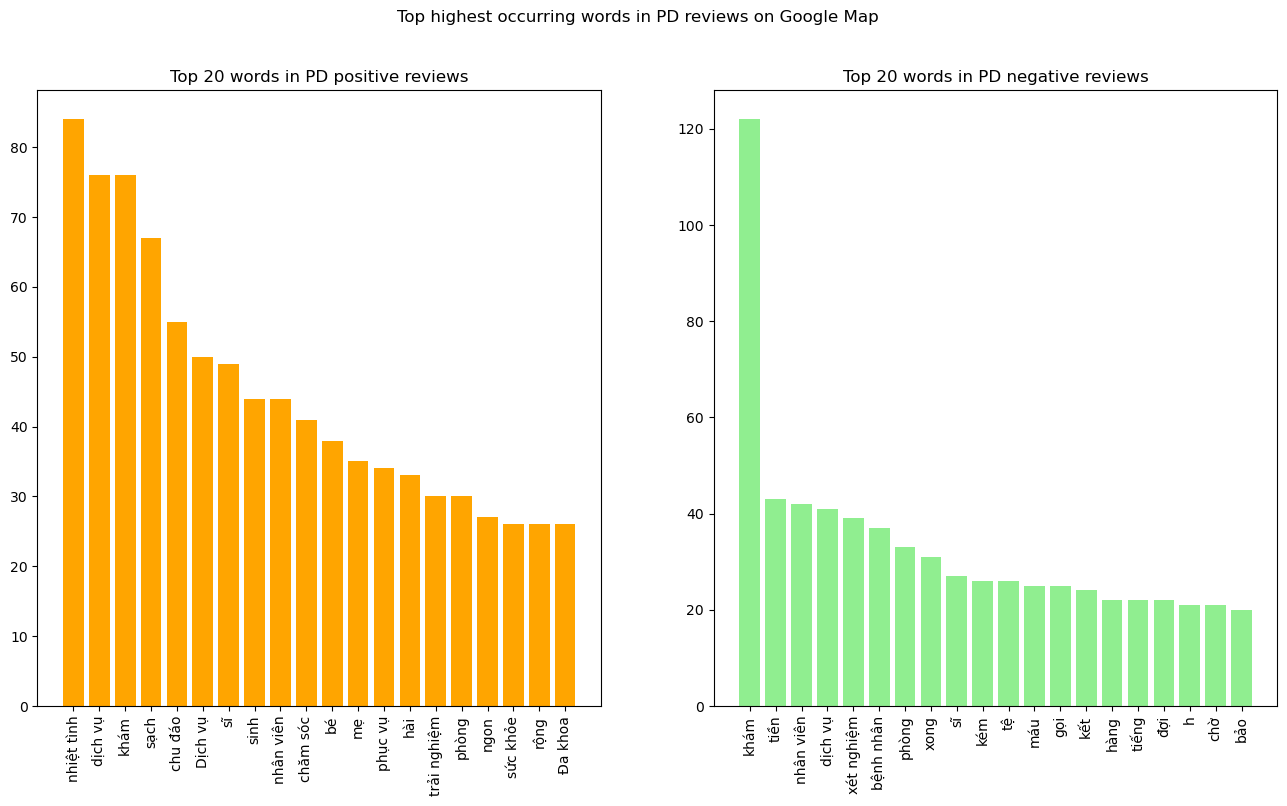

In [268]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# Create a bar plot of word vs count on the first axis
ax[0].bar(x=freq_dataframe_pos.Words, height=freq_dataframe_pos.Count, color='orange')
ax[0].set_title('Top 20 words in PD positive reviews')
ax[0].set_xticklabels(freq_dataframe_pos.Words, rotation=90)

# Create a bar plot of word vs count on the second axis
ax[1].bar(x=freq_dataframe_ne.Words, height=freq_dataframe_ne.Count, color='lightgreen')
ax[1].set_title('Top 20 words in PD negative reviews')
ax[1].set_xticklabels(freq_dataframe_ne.Words, rotation=90)

# Add a title to the Figure
fig.suptitle('Top highest occurring words in PD reviews on Google Map')

In [295]:
# selecting top 200 most frequent words
freq_dataframe_ne = freq_dataframe.nlargest(columns='Count', n = 200)

In [299]:
freq_dataframe_ne.head()

,Words,Count
126,khám,122
153,tiền,43
37,nhân viên,42
1,dịch vụ,41
96,xét nghiệm,39


In [301]:
freq_dataframe_ne.to_csv("freq_dataframe_ne.csv", index = False)

In [300]:
freq_dataframe_pos.head()

,Words,Count
20,nhiệt tình,84
1,dịch vụ,76
25,khám,76
37,sạch,67
278,chu đáo,55


In [302]:
freq_dataframe_pos.to_csv("freq_dataframe_pos.csv", index = False)

In [ ]:
# selecting top 200 most frequent words
freq_dataframe_po = freq_dataframe.nlargest(columns='Count', n = 200)